# La methode des volumes finis pour des problèmes de diffusion

## Le problème stationnaire de diffusion 1D

### Description du problème

On considère ici le problème stationnaire de diffusion de la quantité $\phi$ en 1D sur le domaine [0,L=0.5], régit par l'équation aux dérivées partielles suivante:

\begin{equation}
  \nabla.(\nabla\phi)=\frac{\partial}{\partial x} (\frac{\partial \phi}{\partial x}) = 0 
\end{equation}

avec les conditions aux limites suivantes :

- $\phi(0) = \phi_A = 100$
- $\phi(L) = \phi_B = 500$

In [1]:
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

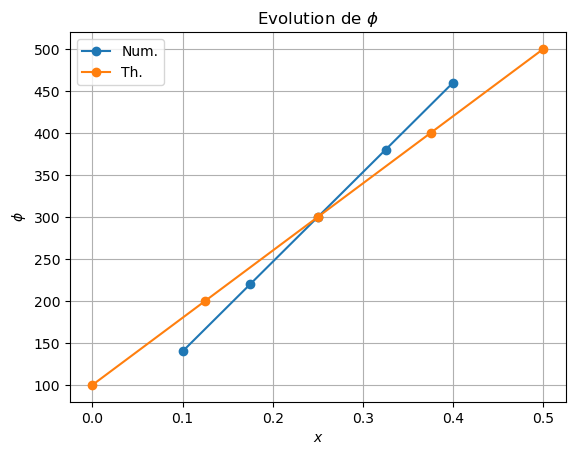

In [2]:
# Creation du maillage
N = 5                      # Nb de cellules
L = 0.5                     # Longueur du domaine
dx = L / (N)               # Pas d'espace
x = np.linspace(dx,L-dx,N) # Maillage 1D (abscisse centre des cellules)

a = np.zeros((N,N))       # Matrice du schéma numérique
b = np.zeros(N)            # Vecteur second membre

# Paramètres physiques
phiA = 100                    # Température de paroi
phiB = 500                    # Température de paroi

#
# Remplissage de la matrice du système linéaire
#

# Noeud 0 ordre 1 
a[0,0] = 3/dx
a[0,1] = -1/dx
b[0] = 2*phiA/dx

# Noeuds interieurs ordre 2
for i in range(1, N-1):
    a[i,i-1] = -1/dx
    a[i,i] = 2/dx
    a[i,i+1] = -1/dx
    b[i] = 0

# Noeud 4 ordre 1
a[N-1,N-2] = -1/dx
a[N-1,N-1] = 3/dx
b[N-1] = 2*phiB/dx

# Calcul de la solution
phi = np.linalg.solve(a,b)

# Solution analytique
x_ana = np.linspace(0,L,N)
phi_ana = (phiB-phiA)*x_ana/L+phiA

# Affichage de la solution
plt.figure()
plt.grid()
plt.title(r"Evolution de $\phi$")
plt.plot(x,phi,'-o',label="Num.")
plt.plot(x_ana,phi_ana,'-o',label="Th.")
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()


In [3]:
phi

array([140., 220., 300., 380., 460.])

### Influence du maillage


En l'abscence de solution analytique, de données tierces (experimentales ou numériques), il est important de tester l'influence de la discrétisation spatiale sur les résultats et de montrer une convergence en maillage.

Testons à cette fin différents niveaux de discrétisation :
 - $N=5$
 - $N = 10$
 - $N = 100$

 Pour cela il est plus facile de créer une fonction qui va ,entre autre, prendre comme argument le nombre de cellules $N$ du maillage.

In [4]:
def diffusion(L,N,phiA,phiB):
    # Creation du maillage
    dx = L / (N)               # Pas d'espace
    x = np.linspace(dx/2,L-dx/2,N) # Maillage 1D (abscisse centre des cellules)

    a = np.zeros((N,N))       # Matrice du schéma numérique
    b = np.zeros(N)            # Vecteur second membre

    #
    # Remplissage de la matrice du système linéaire
    #

    # Noeud 0 ordre 1 
    a[0,0] = 3/dx
    a[0,1] = -1/dx
    b[0] = 2*phiA/dx

    # Noeuds interieurs ordre 2
    for i in range(1, N-1):
        a[i,i-1] = -1/dx
        a[i,i] = 2/dx
        a[i,i+1] = -1/dx
        b[i] = 0

    # Noeud 4 ordre 1
    a[N-1,N-2] = -1/dx
    a[N-1,N-1] = 3/dx
    b[N-1] = 2*phiB/dx

    # Calcul de la solution
    phi = np.linalg.solve(a,b)

    # Renvoi de la solution
    return x, phi

In [5]:
# Résolutions des différents maillages
N1 = 5
N2 = 10
N3 = 100

# Paramètres physiques
L= 0.5 
phiA = 100                    # Température de paroi
phiB = 500                    # Température de paroi

# Solutions obtenues pour les différents maillages
x1, phi1 = diffusion(L,N1,phiA,phiB)
x2, phi2 = diffusion(L,N2,phiA,phiB)
x3, phi3 = diffusion(L,N3,phiA,phiB)

# Solution analytique
x_ana = np.linspace(0,L,N1)
phi_ana = (phiB-phiA)*x_ana/L+phiA


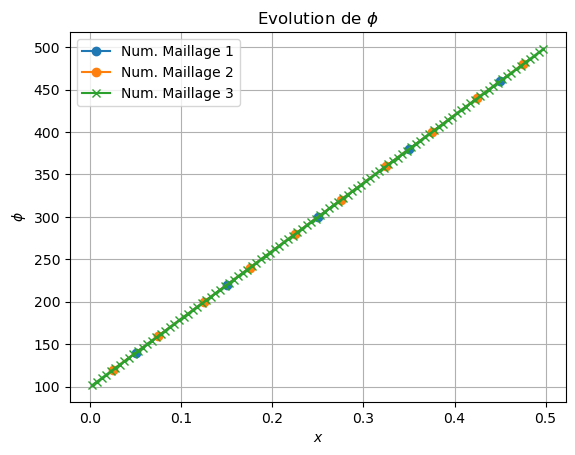

In [6]:
# Affichage de la solution
plt.figure()
plt.grid()
plt.title(r"Evolution de $\phi$")
plt.plot(x1,phi1,'-o',label="Num. Maillage 1")
plt.plot(x2,phi2,'-o',label="Num. Maillage 2")
plt.plot(x3,phi3,'-x',label="Num. Maillage 3")
#plt.plot(x_ana,phi_ana,'-',label="Th.")
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()

### Comparaison avec la solution analytique du pb

La solution analytique du problème de diffusion pure s'obtient par double intégration de l'équation du second ordre suivante :

\begin{equation}
 \frac{\partial}{\partial x} (\frac{\partial \phi}{\partial x}) = \frac{\partial^2}{\partial x^2} (\phi) = 0 
\end{equation}

Les constantes d'intégration étant obtenues par les conditions aux limites :


- $\phi(0) = \phi_A = 100$
- $\phi(L) = \phi_B = 500$

Le profil de $\phi(x)$ est donc de la forme : 

$$\phi(x)=Ax+B$$

avec :
- $\phi(0) = A\times 0 + B = \phi_A$ soit $B=\phi_A$
- $\phi(L) = A\times L + B = \phi_B$ soit $A=(\phi_B-\phi_A)/L$

Il vient ainsi : 

$$\phi(x)=\frac{\phi_B-\phi_A}{L}x + \phi_A$$


In [7]:
# Solution analytique
x_ana = np.linspace(0,L,N1)
phi_ana = (phiB-phiA)*x_ana/L+phiA

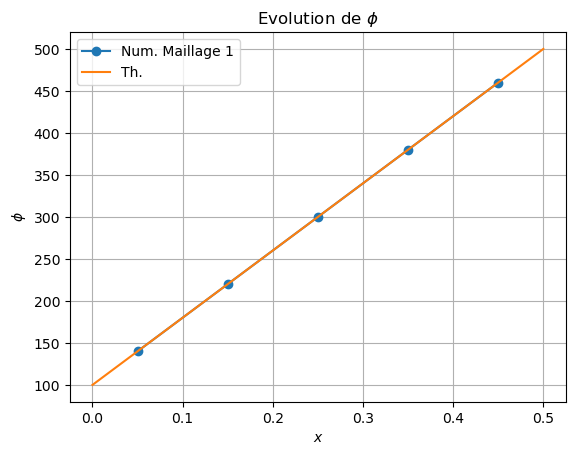

In [8]:
# Comparaison solution analytique et solution numérique
plt.figure()
plt.grid()
plt.title(r"Evolution de $\phi$")
plt.plot(x1,phi1,'-o',label="Num. Maillage 1")
plt.plot(x_ana,phi_ana,'-',label="Th.")
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()

### Résolution par la méthode de Gauss-Seidel

La résolution numérique précedente repose sur une méthode directe qui, pour des maillages de faible dimension, reste efficace pour résouddre le système d'eq. algébriques.
Pour des maillages présentant un nombre de cellules plus importants les méthodes directes sont moins bien adaptées et les methodes itératives sont conseillées.

Parmis celle-ci, la methode de Gauss-Seidel est facile à implémentaer et c'est celle qui ous est proposée par la suite.


In [9]:
def gauss_seidel(a,b,eps):
    """
    Resoud un systeme d'eq; lineaires de la forme Ax = b avec la methode iterative de Gauss-Seidel
    'A': Matrice (n, n)
    'b': Second membre (n, 1)
    'tol': tolerance a atteindre
    'maxIter': nb max d'iterations
    """
    # Dimension de la matrice
    nLig, nCol = np.shape(a)
    n = nLig  # Dimension de la matrice a(n,n)
    
    # Initialisation
    x0 = np.zeros(n) * 5  
    iter = 0
    x=x0 # Initialisation de la solution à l'iteration 0 : x^0
    residu=np.linalg.norm(np.dot(a,x)-b) # Residu initial
    
    # Boucle du processus iteratif
    while (residu > eps):
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += a[i, j] * x[j] # Calcul de la somme des termes sauf celui de la diagonale
            x[i] = (b[i] - sigma) / a[i, i]
            
        # Actualisation residu
        residu = np.linalg.norm(np.dot(a,x)-b)
        
        # On incrémente l'iteration
        iter += 1
        
    return [x,iter,residu] 

In [15]:
def diffusion_gs(L,N,phiA,phiB,eps):
    # Creation du maillage
    dx = L / (N)               # Pas d'espace
    x = np.linspace(dx/2,L-dx/2,N) # Maillage 1D (abscisse centre des cellules)

    a = np.zeros((N,N))       # Matrice du schéma numérique
    b = np.zeros(N)            # Vecteur second membre

    #
    # Remplissage de la matrice du système linéaire
    #

    # Noeud 0 ordre 1 
    a[0,0] = 3/dx
    a[0,1] = -1/dx
    b[0] = 2*phiA/dx

    # Noeuds interieurs ordre 2
    for i in range(1, N-1):
        a[i,i-1] = -1/dx
        a[i,i] = 2/dx
        a[i,i+1] = -1/dx
        b[i] = 0

    # Noeud 4 ordre 1
    a[N-1,N-2] = -1/dx
    a[N-1,N-1] = 3/dx
    b[N-1] = 2*phiB/dx

    # Calcul de la solution
    phi,iter,res = gauss_seidel(a, b, eps)
    print("La solution est obtenue avec un résidu de ",res," en ",iter," iterations")
    
    # Renvoi de la solution
    return x, phi

In [16]:
# Maillage
N = 5                # Nb de cellules
L = 0.5               # Longueur du domaine

# Paramètres physiques
phiA = 100        # Température de paroi
phiB = 500        # Température de paroi

# Calcul de la solution par methode directe
x, phi = diffusion(L,N,phiA,phiB)

# Calcul de la solution par la méthode de Gauss-Seidel
eps = 1e-2
x_gs, phi_gs = diffusion_gs(L,N,phiA,phiB,eps)

# Solution analytique
x_ana = np.linspace(0,L,N)
phi_ana = (phiB-phiA)*x_ana/L+phiA

La solution est obtenue avec un résidu de  0.007473047174715239  en  33  iterations


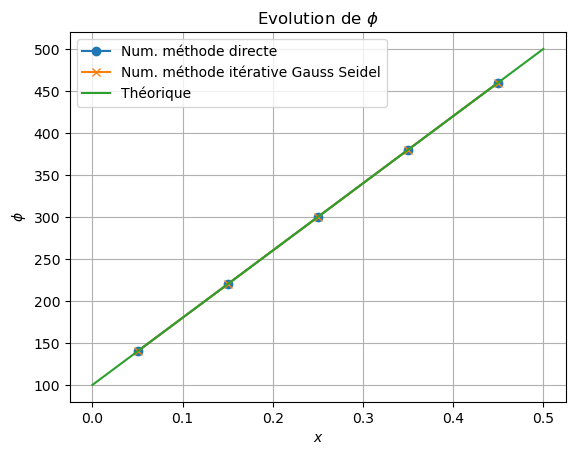

In [20]:
# Affichage de la solution
plt.figure()
plt.grid()
plt.title(r"Evolution de $\phi$")
plt.plot(x,phi,'-o',label="Num. méthode directe")
plt.plot(x_gs,phi_gs,'-x',label="Num. méthode itérative Gauss Seidel")
plt.plot(x_ana,phi_ana,'-',label="Théorique")
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()

In [18]:
phi

array([140., 220., 300., 380., 460.])

In [19]:
phi_gs

array([139.99952678, 219.99905356, 299.99905356, 379.99936904,
       459.99978968])

In [7]:
def gauss_seidel2(a, b, tol=1e-12, maxIter=10000):
    """
    Resoud un systeme d'eq. lineaires de la forme Ax = b avec la methode iterative de Gauss-Seidel
    'A': Matrice (n, n)
    'b': Second membre (n, 1)
    'tol': tolerance a atteindre
    'maxIter': nb max d'iterations
    """
    iters = 1  # Iteration du processus

    nLig, nCol = np.shape(a)
    n = nLig  # Dimension de la matrice a(n,n)
    x = np.random.rand(n) * 5  # Initialisation de la solution à l'iteration 0
    sigmaTol = 1  # Pour calcul de la tolerance

    while True:
        if iters > maxIter:
            print("Le Nb max d'iterations est atteint. Fin.")
            break

        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += a[i, j] * x[j]
            x[i] = (b[i] - sigma) / a[i, i]

        tolerance = abs(sigmaTol - sigma)
        if tolerance <= tol:
            print("La precision visee est atteinte en \t %d iterations." % (iters))
            break

        sigmaTol = sigma
        iters += 1

    return x

In [ ]:
def Jacobi(A,b,x0,eps):
    # Initialisations
    k=0
    x=x0             # x_{k}
    x_precedent=x0   # x_{k-1}
    residu=norm(dot(A,x)-b)
    i,j = np.indices(A.shape)
    while(residu>eps):
        # On incrémente indice
        k+=1
        # Actualisation x_precedent
        x_precedent=x
        # Nouvelle solution x utilisant x_precedent
        x=(b-dot(A-diag(diag(A)),x_precedent))/diag(A)
        # Actualisation residu
        residu=norm(dot(A,x)-b)    
    return [x,k,residu]


## Le problème instationnaire de diffusion 1D

### Description du problème

Une plaque mince est portée à une température uniforme de 200°C. À instant $t=0$ la température du côté droit de la plaque est soudainement réduite à 0°C. Le coté gauche est quand à lui supposé isolé. 

L'équation de conduction thermique transitoire qui correspond au problème 1D peut s'écrire : 
$$\rho c_{p}\frac{\partial T}{\partial t}=\frac{\partial}{\partial x}\left(\lambda\frac{\partial T}{\partial x}\right)$$

On notera $\alpha=\frac{\lambda}{\rho c_{p}}\,\left(m^{2}.s^{-1}\right)$ le coefficient de diffusion thermique, $\lambda\,\left(W.m^{-1}.K^{-1}\right)$ la conductivité thermique, $\rho\,\left(kg.m^{-3}\right)$ la masse volumique et $c_{p}\,(J.kg^{-1}.K^{-1})$ la capacité thermique massique 

avec :
-  comme condition initiale : $T\left(x,0\right)=200\,\forall x$
- comme conditions aux limites : $\frac{\partial T}{\partial x}\left(0,t\right)=0\,\forall t>0$ et $T\left(L,t\right)=0\,\forall t>0$

**Données :** longueur de la plaque $L=2\text{ cm}$, conductivité thermique $\lambda=10W.m^{-1}.K^{-1}$ et $\rho c_{p}=10\times10^{6}J.m^{-3}.K^{-1}$. 


 Le pas de temps max pour garantir la stabilité du schéma explicite est : 	8.0


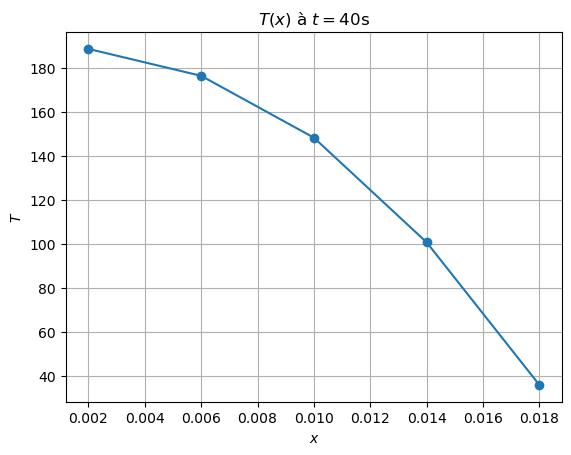

In [20]:
import numpy as np
from matplotlib import pyplot as plt

# Maillage
L = 0.02                    # Longueur du domaine de calcul
N = 5                       # Nb de cellules
#dx = L/float(N-1)
dx = L/float(N)             # Pas d'espace
x = np.linspace(dx/2, L-dx/2, N)    # Abscisses des centres des cellules

# Paramètres physique
k = 10          # Conductivité thermique
rho_c = pow(10,7)
T_init = 200    # Température initiale
T_L = 0         # Température en x=L

t_fin = 40          # Temps final à atteindre
dt = 2              # Pas de temps
Nt = int(t_fin/dt)  # Nombres d'itérations temporelles
dt_max = rho_c*(dx*dx/float(2.0*k))        #  pas de temps max autorisé pour la stabilité
print ("\n Le pas de temps max pour garantir la stabilité du schéma explicite est : \t" + str(dt_max))

# Initialisation
T = np.zeros(N)
T_old = np.ones(N) * T_init

for n in range(Nt):
    for i in range(1, N-1):
        aW = k / float(dx)
        aE = k / float(dx)
        Su = 0
        aP = rho_c * dx / float(dt)
        T[i] = (aW * T_old[i - 1] + aE * T_old[i + 1] + (aP - (aW + aE)) * T_old[i] + Su) / float(aP)

    # Cellule frontière 0 - x=0
    aW = 0
    aE = k / float(dx)
    Su = 0
    aP = rho_c * dx / float(dt)
    T[0] = (aE * T_old[1] + (aP - (aW + aE)) * T_old[0] + Su) / float(aP)

    # Cellule frontière N - x=L
    aE = 0
    aW = k / float(dx)
    Su = (2.0 * k / float(dx)) * (T_L - T_old[-1])
    aP = rho_c * dx / float(dt)
    T[-1] = (aW * T_old[-2] + (aP - (aW + aE)) * T_old[-1] + Su) / float(aP)

    for i in range(len(T)):
        T_old[i] = T[i]

plt.figure()
plt.plot(x, T, '-o')
plt.xlabel(r"$x$")
plt.ylabel(r"$T$")
plt.title(r"$T(x)$ à $t=$"+str(t_fin)+"s")
plt.grid()
plt.show()


#### Variante avec fonction et tableau T contenant TOUTE l'évolution temporelle

In [23]:
import numpy as np
from matplotlib import pyplot as plt

In [24]:
def diffusion_unsteady(L, N, Nt, T_init, T_L):
    
    # Maillage
    dx = L/float(N)                     # Pas d'espace
    x = np.linspace(dx/2, L-dx/2, N)    # Abscisses des centres des cellules

    # Initialisation
    T = np.zeros((N,Nt+1))
    T[:,0] = T_init

    for n in range(Nt):
        for i in range(1, N-1):
            aW = k / float(dx)
            aE = k / float(dx)
            Su = 0
            aP = rho_c * dx / float(dt)
            T[i,n+1] = (aW * T[i - 1,n] + aE * T[i + 1,n] + (aP - (aW + aE)) * T[i,n] + Su) / float(aP)

        # Cellule frontière 0 - x=0
        aW = 0
        aE = k / float(dx)
        Su = 0
        aP = rho_c * dx / float(dt)
        T[0,n+1] = (aE * T[1,n] + (aP - (aW + aE)) * T[0,n] + Su) / float(aP)

        # Cellule frontière N - x=L
        aE = 0
        aW = k / float(dx)
        Su = (2.0 * k / float(dx)) * (T_L - T[-1,n])
        aP = rho_c * dx / float(dt)
        T[-1,n+1] = (aW * T[-2,n] + (aP - (aW + aE)) * T[-1,n] + Su) / float(aP)

    return x, T

In [42]:
# Maillage
L = 0.02                    # Longueur du domaine de calcul
N = 5                       # Nb de cellules

# Paramètres physique
k = 10          # Conductivité thermique
rho_c = pow(10,7)
T_init = 200    # Température initiale
T_L = 0         # Température en x=L

t_fin = 500          # Temps final à atteindre
dt = 2              # Pas de temps
Nt = int(t_fin/dt)  # Nombres d'itérations temporelles
dt_max = rho_c*(dx*dx/float(2.0*k))        #  Pas de temps max autorisé pour la stabilité
print ("\n Le pas de temps max pour garantir la stabilité du schéma explicite est : \t" + str(dt_max))


 Le pas de temps max pour garantir la stabilité du schéma explicite est : 	8.0


In [43]:
# Calcul de la solution
x, T = diffusion_unsteady(L,N,Nt,T_init,T_L)

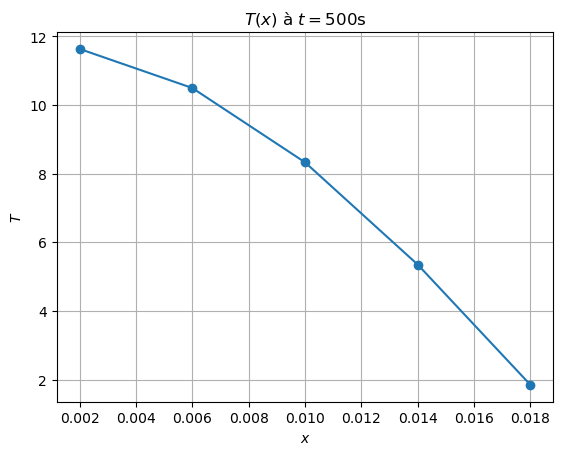

In [44]:
# Affichage de la solution
plt.figure()
plt.plot(x, T[:,Nt], '-o')
plt.xlabel(r"$x$")
plt.ylabel(r"$T$")
plt.title(r"$T(x)$ à $t=$"+str(Nt*dt)+"s")
plt.grid()
plt.show()

#### Bof pour la présentation des résultats ... :(

Essayons d'utiliser les widgets pour rendre l'analyse de la solution plus ludique, interactive et efficace.

In [47]:
# Importation du module des widgets
from ipywidgets import interactive

def plot_sol(m=0):
    "Afichage de la solution à une iteration m"
    plt.figure(2)
    plt.plot(x, T[:,m], '-o')
    plt.ylim(0,T_init+5)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$T$")
    plt.title(r"$T(x)$ à $t=$"+str(m*dt)+"s")
    plt.grid()
    plt.show()

interactive_plot = interactive(plot_sol, m=(0, Nt))
output = interactive_plot.children[-1]
interactive_plot


interactive(children=(IntSlider(value=0, description='m', max=250), Output()), _dom_classes=('widget-interact'…